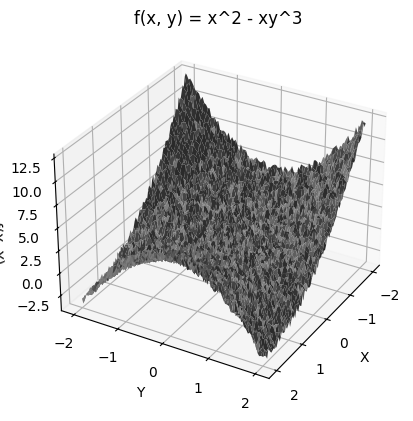

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x, y)
def f(x, y):
    return x**2 - x*y**2

# Create a grid of values for x and y
nx = 100; ny = 100; N = nx*ny
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
x, y = np.meshgrid(x, y)

# Evaluate the function over the grid
noise = 1
z = f(x, y) +  noise*np.random.rand(nx, ny)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#surf = ax.plot_surface(x, y, z, cmap='viridis')
surf = ax.plot_surface(x, y, z, color='gray')

# Add a color bar which maps values to colors
#fig.colorbar(surf)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

# Set title
ax.set_title('f(x, y) = x^2 - xy^3')
ax.view_init(elev=30, azim=30)
# Show the plot
plt.show()


In [2]:
x2 = x.reshape(N,1)
y2 = y.reshape(N,1)
F = z.reshape(N,1)

th1 = 1 + 0*x2  # constant
th2 = x2 # linear terms
th3 = y2
th4 = x2*x2 # quadratic terms
th5 = x2*y2
th6 = y2*y2
th7 = x2*x2*x2 # cubic terms
th8 = x2*x2*y2
th9 = x2*y2*y2
th10 = y2*y2*y2

Theta = np.column_stack((th1, th2, th3, th4, th5, th6, th7, th8, th9, th10))





[ 0.         -0.          0.          0.9353291   0.          0.
 -0.00296271 -0.         -0.97592559  0.        ]
(100, 100)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


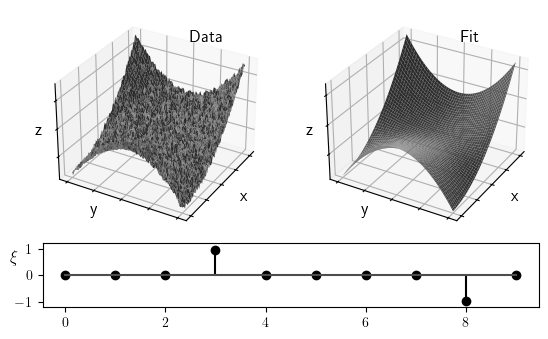

In [3]:
from sklearn.linear_model import Lasso
plt.rc('text', usetex=True)

alpha = 0.1  # Regularization strength
lasso = Lasso(alpha=alpha)
lasso.fit(Theta, F)
xi = lasso.coef_

#plt.stem(xi)
print(xi)

Fapprox = (np.dot(Theta,xi)).reshape(nx,ny)
print(Fapprox.shape)

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(x, y, z, color='gray')
ax.view_init(elev=30, azim=30)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.gca().set_zticklabels([])

ax = fig.add_subplot(122, projection='3d')
surf = ax.plot_surface(x, y, Fapprox, color='gray')
ax.view_init(elev=30, azim=30)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.gca().set_zticklabels([])

ax = fig.add_subplot(515)
plt.stem(xi,linefmt='0.0', markerfmt='o', basefmt='0.3')
plt.ylim(-1.2, 1.2)

plt.text(3.5, 2.8, 'x', fontsize=12)
plt.text(0.5, 2.3, 'y', fontsize=12)
plt.text(-0.6, 5.3, 'z', fontsize=12)
plt.text(2.5, 8.8, 'Data', fontsize=12)

plt.text(8.9, 2.8, 'x', fontsize=12)
plt.text(5.9, 2.3, 'y', fontsize=12)
plt.text(4.8, 5.3, 'z', fontsize=12)
plt.text(7.9, 8.8, 'Fit', fontsize=12)

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

plt.text(-1.1, 0.5, r'$\bf \xi$', fontsize=12)

plt.savefig('FitSINDY.eps', format='eps', bbox_inches='tight')
plt.show()

#plt.tight_layout()


[[ 4.90685248e-01]
 [-1.22060008e-02]
 [ 4.61428586e-03]
 [ 1.00290480e+00]
 [ 3.57309199e-04]
 [ 2.50083712e-03]
 [ 6.11379612e-04]
 [-1.66285493e-03]
 [-9.96589394e-01]
 [-7.90804288e-04]]


<StemContainer object of 3 artists>

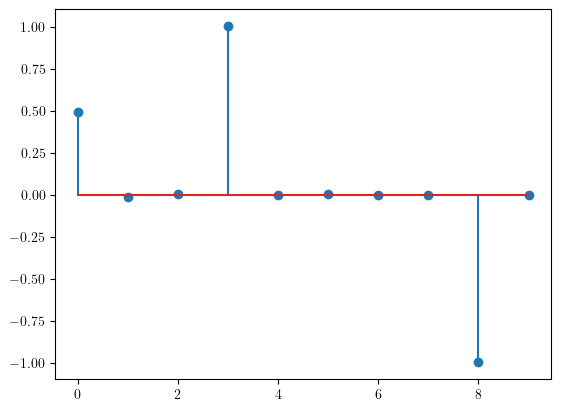

In [4]:
xi, residuals, rank, s = np.linalg.lstsq(Theta, F, rcond=None)
print(xi)
plt.stem(xi)